In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [11]:
X_train, X_test =[],[]
Y_train, Y_test =[],[]
for i in range(1,42):
    for j in range(1,10):
        img=cv2.imread('data/{}_{}.png'.format(i,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (46, 56))
        X_train.append(img)
        Y_train.append(i)
    img=cv2.imread('data/{}_10.png'.format(i,j),cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    Y_test.append(i)

X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(369, 56, 46) (369,)
(41,) (41,)


/var/folders/8v/6y9ty40n6l56hhp59z__bq080000gn/T/ipykernel_769/3513641406.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test=np.array(X_test)


In [12]:
x= X_train.reshape(len(Y_train),-1)
print(x.shape)

(369, 2576)


## 1. mean face & first four eigenfaces

ValueError: 'ANYCOLOR' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

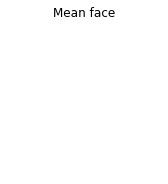

In [13]:
pca=PCA()
pca.fit(X_train.reshape(len(Y_train),-1))

plt.figure(figsize=(16,12))
plt.subplot(1,5,1)
plt.axis('off')
plt.title('Mean face')
plt.imshow(pca.mean_.reshape(X_train[0].shape),cmap='ANYCOLOR')

for i in range(4):
    plt.subplot(1,5,i+2)
    plt.axis('off')
    plt.title('Eigenface{}'.format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape),cmap='ANYCOLOR')
plt.show()


## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

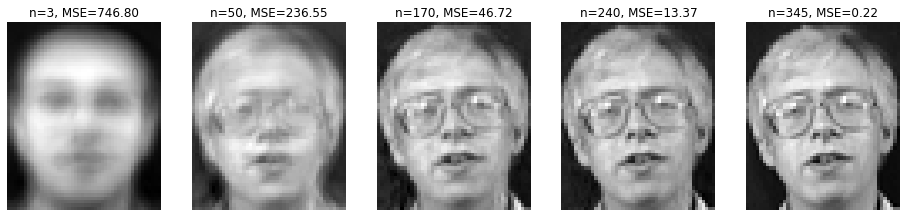

## 4. cross-validation results

k=1
   n=3, score=0.7111
   n=50, score=0.9750
   n=170, score=0.9750
k=3
   n=3, score=0.6444
   n=50, score=0.9167
   n=170, score=0.9250
k=5
   n=3, score=0.6139
   n=50, score=0.8722
   n=170, score=0.8750


## 5. recognition rate of the testing set

accuracy = 0.95
